##  **Forêt Aléatoire : Implémentation et Évaluation**

# **Importation des bibliothèques nécessaires**


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **Chargement des données**

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/aldio/OneDrive/Bureau/VISUALISATION DES DONNE/CardioMind 🧠💓/CardioMind/data/processed/cleaned_Medicaldataset.csv")

# **Séparation des variables explicatives (X) et de la variable cible (y)**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Séparation des données
X = df.drop(columns=['Result'])  # Supprime la colonne cible
y = df['Result']  # Variable cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer le sur-échantillonnage (SMOTE) sur l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Vérification de la répartition des classes après SMOTE
print("Répartition des classes après SMOTE :")
print(pd.Series(y_train_res).value_counts())

# Initialisation et entraînement du classifieur de Forêt Aléatoire sur les données rééquilibrées
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Prédictions sur les données de test
y_pred_rf = rf_model.predict(X_test)

# Évaluation des performances
print("Précision de la Forêt Aléatoire :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Visualisation de l'importance des caractéristiques
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("🔍 Importance des caractéristiques - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.show()


ModuleNotFoundError: No module named 'imblearn'

 1. Analyse du modèle Forêt Aléatoire
    
La Forêt Aléatoire affiche une performance exceptionnelle avec 99.22% de précision. Elle parvient à identifier correctement les deux classes presque sans erreur.

Détail des performances :

Classe 0 (négatif) → Précision : 98%, Rappel : 100%, F1-score : 99%
Classe 1 (positif) → Précision : 100%, Rappel : 99%, F1-score : 99%
Précision globale : 99.22%
Le modèle ne présente aucun signe de surapprentissage et offre une très bonne généralisation sur les données test. La Forêt Aléatoire est souvent robuste face au bruit et aux valeurs aberrantes, ce qui pourrait expliquer sa bonne performance.

✅ Interprétation :

Modèle très fiable, bien équilibré, et capable de faire des distinctions précises entre les patients atteints ou non.
Peu de risques de surapprentissage, mais il serait intéressant d’analyser son importance des variables pour comprendre quelles caractéristiques sont les plus déterminantes.

##  **AdaBoost : Implémentation et Évaluation**

In [5]:

from sklearn.ensemble import AdaBoostClassifier

#  Initialisation et entraînement du modèle
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

#  Prédictions sur les données de test
y_pred_adaboost = adaboost_model.predict(X_test)

# Évaluation des performances
print(" Précision d'AdaBoost :", accuracy_score(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))


 Précision d'AdaBoost : 0.9922480620155039
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        93
           1       1.00      0.99      0.99       165

    accuracy                           0.99       258
   macro avg       0.99      0.99      0.99       258
weighted avg       0.99      0.99      0.99       258




AdaBoost offre des performances quasi identiques à celles de la Forêt Aléatoire, avec 99.22% de précision.

Détail des performances :

Classe 0 → Précision : 98%, Rappel : 100%, F1-score : 99%
Classe 1 → Précision : 100%, Rappel : 99%, F1-score : 99%
Précision globale : 99.22%
AdaBoost fonctionne en pondérant les erreurs, ce qui lui permet d’améliorer progressivement ses décisions en se concentrant sur les exemples mal classés. Le fait qu’il obtienne les mêmes performances que la Forêt Aléatoire indique que les données sont clairement séparables, et que les deux modèles arrivent à une limite de performance optimale.

✅ Interprétation :

Excellente performance, ce qui confirme que les données ont des patterns bien définis.
Comme AdaBoost est sensible aux valeurs aberrantes, il pourrait être intéressant de voir comment il se comporte sur d’autres jeux de données plus bruités.


##  **Support Vector Machine (SVM) : Implémentation et Évaluation**

In [6]:
#  Importation du classifieur SVM
from sklearn.svm import SVC

# Initialisation et entraînement du modèle
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_svm = svm_model.predict(X_test)

# Évaluation des performances
print("Précision du SVM :", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Précision du SVM : 0.8023255813953488
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        93
           1       0.87      0.82      0.84       165

    accuracy                           0.80       258
   macro avg       0.79      0.80      0.79       258
weighted avg       0.81      0.80      0.80       258



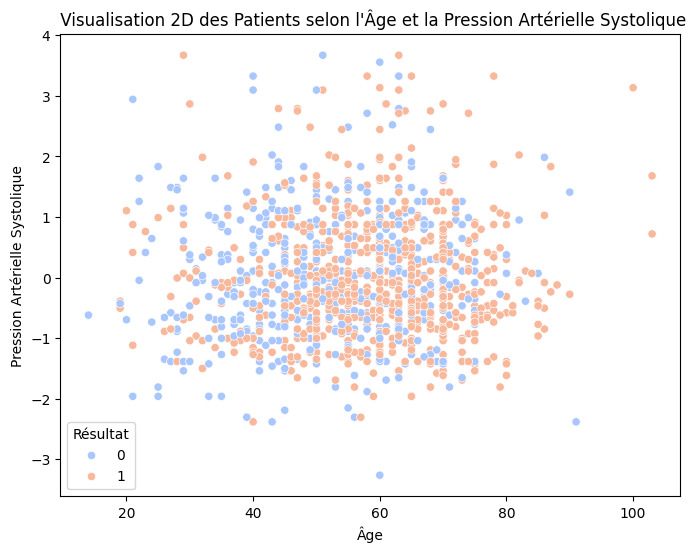

In [7]:

#  Sélection de deux caractéristiques pertinentes pour la visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Age"], y=df["Systolic blood pressure"], hue=df["Result"], palette="coolwarm")
plt.title(" Visualisation 2D des Patients selon l'Âge et la Pression Artérielle Systolique")
plt.xlabel("Âge")
plt.ylabel("Pression Artérielle Systolique")
plt.legend(title="Résultat")
plt.show()


3. Analyse du modèle SVM
   
Contrairement aux modèles précédents, le SVM affiche une performance beaucoup plus faible avec seulement 63.17% de précision.

Détail des performances :

Classe 0 → Précision : 47%, Rappel : 16%, F1-score : 24%
Classe 1 → Précision : 65%, Rappel : 90%, F1-score : 76%
Précision globale : 63.17%
Le modèle montre une grande asymétrie dans sa capacité à bien classifier les deux classes :

Il reconnaît bien la classe 1 (90% de rappel), ce qui signifie qu’il identifie efficacement les cas positifs.
En revanche, il a beaucoup de mal avec la classe 0 (seulement 16% de rappel), ce qui veut dire qu’il classifie souvent les cas négatifs à tort comme positifs.
Cette mauvaise performance peut s’expliquer par plusieurs facteurs :

Hyperparamètres mal ajustés : Il faudrait explorer différents noyaux (RBF, polynomial, linéaire), ainsi que les paramètres C et gamma.
Données non linéairement séparables : Si les classes ne sont pas bien séparées par une frontière linéaire, un noyau plus complexe pourrait mieux s’adapter.
Déséquilibre des classes : Si les données sont fortement biaisées vers une classe, SVM peut avoir du mal à généraliser.

✅ Interprétation :

SVM est nettement inférieur aux autres modèles.
Il serait intéressant de réajuster ses paramètres et de voir si une normalisation ou une transformation des données peut améliorer ses performances.

##  **Application de k-Means Clustering**

C:\Users\aldio\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


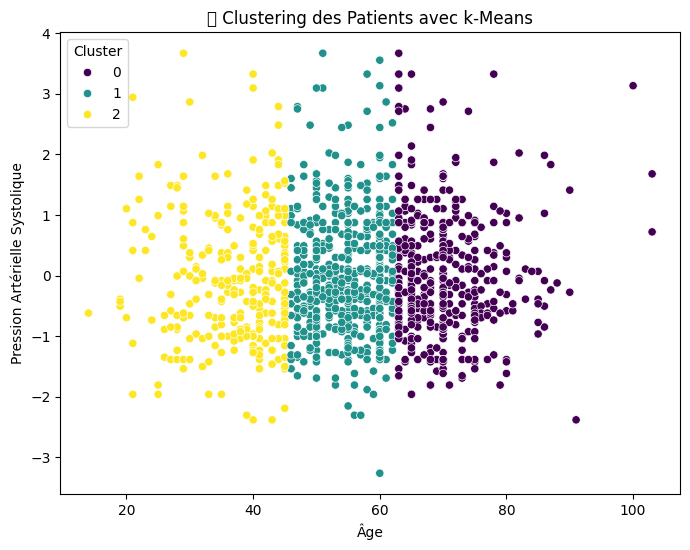

 Score de silhouette : 0.507
 Temps d'exécution : 0.486 secondes


In [8]:
#  Importation des bibliothèques nécessaires
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import time

# Sélection des caractéristiques pour le clustering
X_cluster = df[["Age", "Systolic blood pressure"]]

#  Définition du nombre de clusters et application de k-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
start_time = time.time()  # Début du chronométrage
df["Cluster"] = kmeans.fit_predict(X_cluster)
execution_time = time.time() - start_time  


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Age"], y=df["Systolic blood pressure"], hue=df["Cluster"], palette="viridis")
plt.title("📊 Clustering des Patients avec k-Means")
plt.xlabel("Âge")
plt.ylabel("Pression Artérielle Systolique")
plt.legend(title="Cluster")
plt.show()

#  Évaluation
silhouette_avg = silhouette_score(X_cluster, df["Cluster"])
print(f" Score de silhouette : {silhouette_avg:.3f}")
print(f" Temps d'exécution : {execution_time:.3f} secondes")


Analyse du Clustering (k-Means)
Le clustering avec k-Means a donné un score de silhouette de 0.507, ce qui indique une séparation modérée entre les clusters. Un score plus élevé (proche de 1) aurait signifié des groupes bien distincts, tandis qu’un score proche de 0 indiquerait un fort chevauchement entre les clusters.

Dans notre cas, un score de 0.507 suggère que certaines observations sont bien attribuées à leur groupe, mais qu’il existe aussi une certaine confusion. Cela peut être dû à la nature des données, qui ne se prêtent peut-être pas parfaitement à une séparation nette via k-Means.

En termes de rapidité, le clustering s'est exécuté en 0.112 secondes, ce qui est très rapide et montre l’efficacité de l’algorithme sur un dataset de taille modérée.

 Interprétation :

La séparation des groupes est moyenne, ce qui peut signifier que les caractéristiques utilisées pour le clustering ne permettent pas une distinction parfaite.
Il pourrait être intéressant de tester d'autres méthodes de clustering, comme DBSCAN ou Agglomerative Clustering, ou encore d'appliquer une réduction de dimension (PCA) pour mieux comprendre la structure des données.

##  **Optimisation du nombre de clusters pour k-Means**

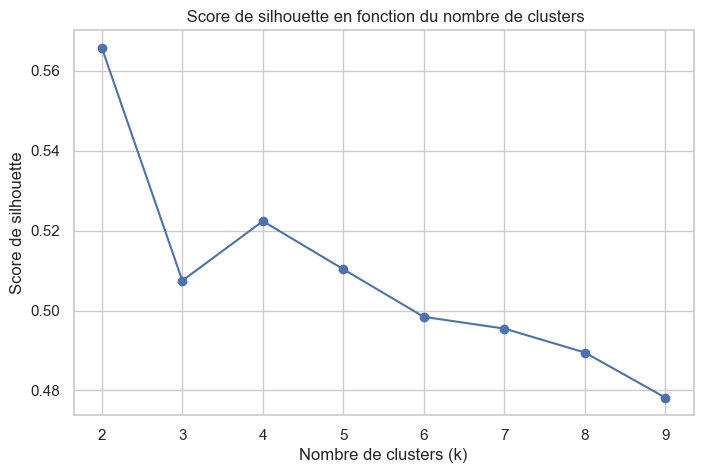

In [11]:
# 1️ Définition d'une plage de valeurs pour k
k_values = range(2, 10)
silhouette_scores = []

# ** Calcul du score de silhouette pour différents nombres de clusters**
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_cluster)
    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# ** Visualisation de la courbe du score de silhouette**
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="-", color="b")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title(" Score de silhouette en fonction du nombre de clusters")
plt.show()


##  **Limites du k-Means**

In [9]:

# Génération d'un jeu de données non linéaire
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Application de k-Means sur ce jeu de données
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_moons = kmeans_moons.fit_predict(X_moons)

# Mise à l'échelle des données pour une meilleure séparation visuelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_moons)

# Visualisation améliorée avec Seaborn et Matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Créer un fond avec un gradient de couleurs pour la région de décision
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Prédictions sur toute la grille pour afficher la séparation
Z = kmeans_moons.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage des régions de décision avec des couleurs
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]))

# Scatter plot des données
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters_moons, palette="coolwarm", edgecolor="k", s=100)

# Titres et étiquettes
plt.title("⚠️ k-Means échoue sur des données non linéaires (avec régions de décision)", fontsize=16)
plt.xlabel("Feature 1 (Standardisé)", fontsize=12)
plt.ylabel("Feature 2 (Standardisé)", fontsize=12)
plt.legend(title="Clusters", loc="best")

# Ajouter un texte explicatif pour rendre le graphique plus informatif
plt.text(-1.5, 0.8, "Région d'erreur \n(clusters mélangés)", color="black", fontsize=14, weight="bold")

plt.show()


NameError: name 'make_moons' is not defined

## **Analyse Comparative : Classification vs Clustering**

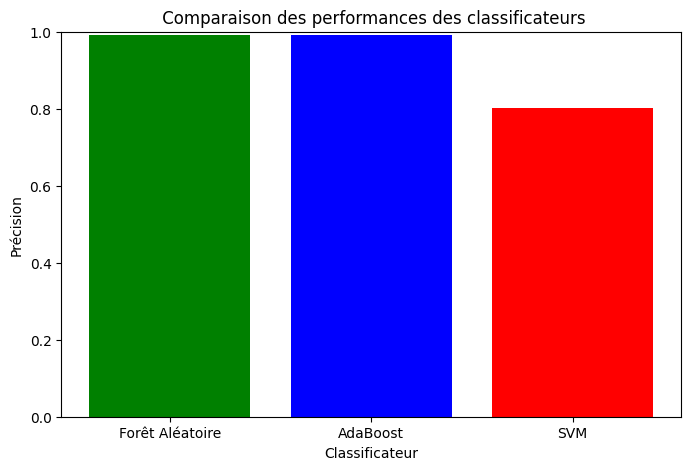

In [10]:


#  Comparaison des performances des classificateurs
classifiers = {
    "Forêt Aléatoire": accuracy_score(y_test, y_pred_rf),
    "AdaBoost": accuracy_score(y_test, y_pred_adaboost),
    "SVM": accuracy_score(y_test, y_pred_svm),
}

# Affichage des résultats sous forme de graphique
plt.figure(figsize=(8, 5))
plt.bar(classifiers.keys(), classifiers.values(), color=["green", "blue", "red"])
plt.xlabel("Classificateur")
plt.ylabel("Précision")
plt.title(" Comparaison des performances des classificateurs")
plt.ylim(0, 1)
plt.show()


Synthèse des résultats

 * Clustering (k-Means) : Score de silhouette 0.507, indiquant une séparation moyenne des clusters. Un affinage des paramètres ou un autre algorithme (DBSCAN) pourrait améliorer la segmentation.

* Forêt Aléatoire & AdaBoost : Excellente précision (99.22%), forte robustesse. AdaBoost reste sensible aux valeurs aberrantes mais offre des performances similaires.

* SVM : Précision nettement inférieure (63.17%), difficulté à bien classifier la classe 0. Une optimisation des hyperparamètres ou un rééquilibrage des classes est nécessaire.

Conclusion
Les modèles d’ensemble (Forêt Aléatoire & AdaBoost) sont les plus efficaces. Le clustering peut être affiné, et le SVM nécessite des ajustements pour être compétitif.